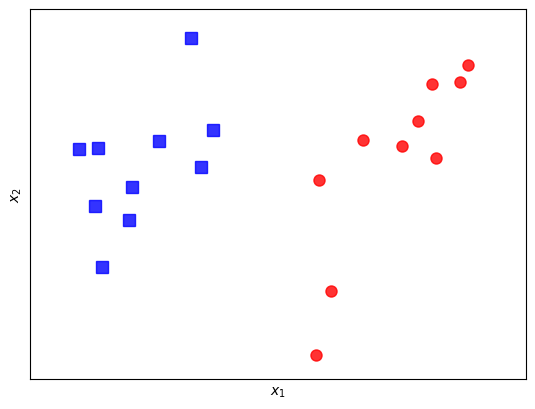

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T
plt.plot(X0[0, :], X0[1, :], 'bs', markersize=8, alpha=.8)
plt.plot(X1[0, :], X1[1, :], 'ro', markersize=8, alpha=.8)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide ticks
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()


In [ ]:
X = np.concatenate((X0, X1), axis=1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis=1)
# Xbar
X = np.concatenate((np.ones((1, 2 * N)), X), axis=0)
print(y.shape)

(1, 20)


In [ ]:
def h(w, x):
  return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
  return np.array_equal(h(w, X), y) # True if h(w, X) == y else False

def perceptron(X, y, w_init):
  w = [w_init]
  N = X.shape[1]
  mis_points = []
  while True:
    # Mix data
    mix_id = np.random.permutation(N)
    for i in range(N):
      xi = X[:, mix_id[i]].reshape(3, 1)
      yi = y[0, mix_id[i]]
      if h(w[-1], xi)[0, 0] != yi:
        mis_points.append(mix_id[i])
        w_new = w[-1] + yi * xi
        w.append(w_new)
    if has_converged(X, y, w[-1]):
      break
  return (w, mis_points)

d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, mis_points) = perceptron(X, y, w_init)
print(w)

[array([[-0.6938787 ],
       [ 0.41077572],
       [ 0.35797638]]), array([[-1.6938787 ],
       [-3.01669008],
       [-0.35456794]]), array([[-0.6938787 ],
       [-0.97951652],
       [ 1.57940339]]), array([[0.3061213 ],
       [1.39367359],
       [3.2981632 ]]), array([[-0.6938787 ],
       [-2.6114465 ],
       [ 1.40526221]]), array([[ 0.3061213 ],
       [-1.03864955],
       [ 2.31233568]]), array([[-0.6938787 ],
       [-5.1778966 ],
       [ 0.21672034]]), array([[ 0.3061213 ],
       [-3.63999603],
       [ 2.09106756]]), array([[ 1.3061213 ],
       [-1.60282248],
       [ 4.02503889]]), array([[ 0.3061213 ],
       [-5.88487872],
       [ 2.22828282]]), array([[ 1.3061213 ],
       [-4.37225982],
       [ 3.63387224]]), array([[ 2.3061213 ],
       [-2.79946288],
       [ 4.54094571]]), array([[ 1.3061213 ],
       [-7.33843933],
       [ 1.99137264]]), array([[ 2.3061213 ],
       [-5.52612776],
       [ 3.55256761]]), array([[ 3.3061213],
       [-3.2329991],
       [

In [ ]:
# generate data
# list

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis=1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis=1)
# Xbar
X = np.concatenate((np.ones((1, 2 * N)), X), axis=0)

def h(w, x):
  return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
  return np.array_equal(h(w, X), y) # True if h(w, X) == y else False

def perceptron(X, y, w_init):
  w = [w_init]
  N = X.shape[1]
  mis_points = []
  while True:
    # Mix data
    mix_id = np.random.permutation(N)
    for i in range(N):
      xi = X[:, mix_id[i]].reshape(3, 1)
      yi = y[0, mix_id[i]]
      if h(w[-1], xi)[0, 0] != yi:
        mis_points.append(mix_id[i])
        w_new = w[-1] + yi * xi
        w.append(w_new)
    if has_converged(X, y, w[-1]):
      break
  return (w, mis_points)

d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(m)


def draw_line(w):
  w0, w1, w2, = w[0], w[1], w[2]

  if w2 != 0:
    x11, x12 = -100, 100
    return plt.plot([x11, x12], [-(w1 * x11 + w0) / w2, -(w1 * x12 + w0)/w2], 'k')

  else:
    x10 = -w0/w1
    return plt.plot([x10, x10], [-100, 100], 'k')



[19, 9, 16, 0, 3, 17, 4, 12, 8, 3, 10, 2]


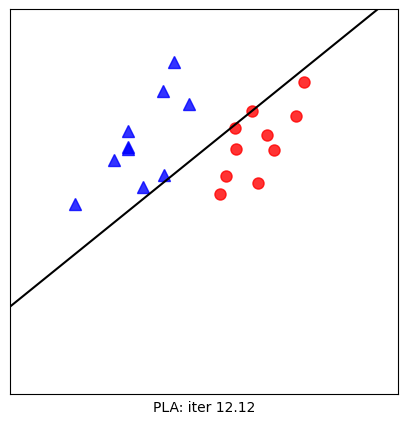

In [ ]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def viz_alg_1d_2(w):
  it = len(w)

  fig, ax = plt.subplots(figsize=(5, 5))

  def update(i):
    ani = plt.cla()
    # points
    ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize=8, alpha=.8)
    ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize=8, alpha=.8)
    ani = plt.axis([0, 6, -2, 4])
    i2 = i if i < it else it - 1
    ani = draw_line(w[i2])
    if i < it - 1:
      circle = plt.Circle((X[1, m[i]], X[2, m[i]]), .15, color='k', fill=False)
      ax.add_artist(circle)
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    label = 'PLA: iter %d.%d' %(i2, it-1)
    ax.set_xlabel(label)
    return ani, ax

  anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
  anim.save('pla_vis.gif', dpi=100, writer='imagemagick')
  plt.show()

viz_alg_1d_2(w)